In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from matplotlib.pyplot import xticks

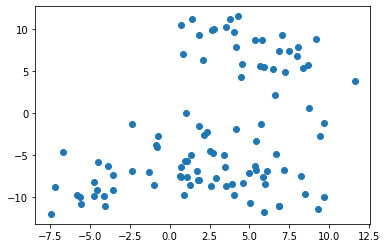

In [3]:
centers_count = 6
X, y = make_blobs(centers=centers_count, random_state=68, cluster_std=2, n_samples=100)
plt.scatter(X[:,0], X[:,1])

In [6]:
def cluster_center(X, c):
    result = np.zeros((centers_count,2))
    for i in range(1,centers_count):
        ix = np.where(c == i)
        result[i-1,:] = np.mean(X[ix,:], axis=1)
    return result

In [16]:
def sum_sq(X, clust, cent):
    sums = np.zeros(centers_count)
    for i in range(1,centers_count+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)
    return np.sum(sums) / centers_count

def sum_av(X, clust, cent):
    sums = np.zeros(centers_count)
    for i in range(1,centers_count+1):
        ix = np.where(clust == i)
        sums[i-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i-1]])**2)/len(*X[ix,:])
    return np.sum(sums) / centers_count

def sum_cl(cent):
    sums = np.sum(euclidean_distances(cent, cent))
    return sums / centers_count

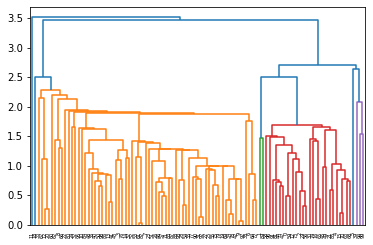

In [30]:
mergings = linkage(X, method='single')
clusterf = fcluster(mergings, centers_count, criterion='maxclust')
c = cluster_center(X, clusterf)
dendrogram(mergings)
plt.show()

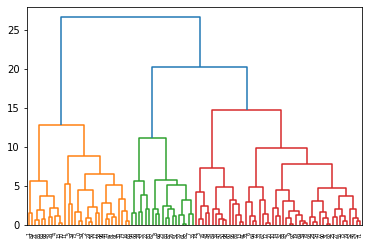

In [13]:
mergings = linkage(X, method='complete')
dendrogram(mergings)
plt.show()

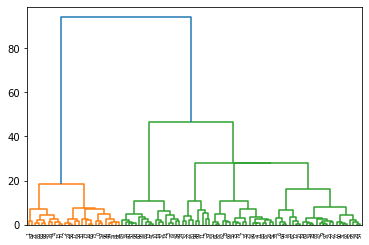

In [9]:
mergings = linkage(X, method='ward')
dendrogram(mergings)
plt.show()

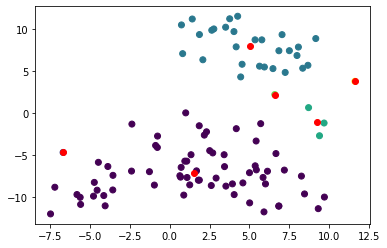

In [31]:
plt.scatter(X[:,0], X[:,1], c=clusterf)
plt.scatter(c[:,0], c[:,1], c='red')

In [32]:
print('Среднее расстояние до центроидов: ', sum_sq(X, clusterf, c))
print('Cредняя сумма внутрикластерных расстояний: ', sum_av(X, clusterf, c))
print('Cредняя сумма междукластерных расстояний: ', sum_cl(c))

Среднее расстояние до центроидов:  342.82696700430887
Cредняя сумма внутрикластерных расстояний:  6.52049107196752
Cредняя сумма междукластерных расстояний:  55.55084804613394


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


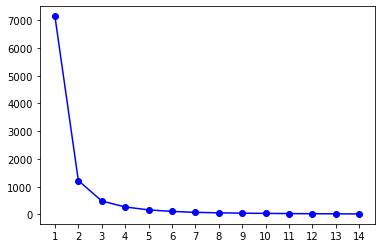

In [25]:
clussters = []
dist = []
cent = []
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(X)
    clussters.append(KM.predict(X))
    cent.append(KM.cluster_centers_)
    dist.append(KM.inertia_ / i)
xticks(np.arange(1, 15, step=1)) 
plt.plot(range(1, 15), dist, '-bo')

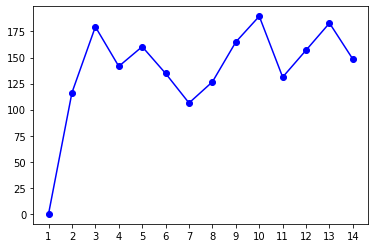

In [28]:
metric = []
for i in range(14):
    sums = np.zeros(i)
    for j in range(i):
        ix = np.where(clussters[i] == j)
        sums[j-1] = np.sum(euclidean_distances(*X[ix,:], [cent[i][j-1]])**2)/len(*X[ix,:])
    metric.append(np.sum(sums) / (i+1))
xticks(np.arange(1, 15, step=1)) 
plt.plot(range(1, 15), metric, '-bo')

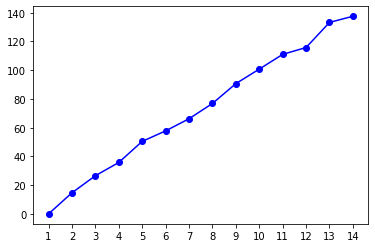

In [29]:
metric = []
for i in range(14):
    sums = np.sum(euclidean_distances(cent[i], cent[i]))
    metric.append(sums / (i+1))
xticks(np.arange(1, 15, step=1)) 
plt.plot(range(1, 15), metric, '-bo')